# RTDE : Real Time Data Exchange from Universal Robots.

Website : https://sdurobotics.gitlab.io/ur_rtde/introduction/introduction.html
API Refrences : https://sdurobotics.gitlab.io/ur_rtde/api/api.html

Installation :

pip install --user ur_rtde         

--user to install for this user and not globally.

Use --no-deps if you created env using mamba/conda and don't want pip to mess things up.

In [1]:
## Import Recieve Client.
import rtde_receive

# set the IP address of the robot controller and the PC.
## TURN ON THE ARMS FROM THE PENDANT BEFORE RUNNING THIS SCRIPT.
LIGHTNING_IP = "192.168.0.102"
THUNDER_IP = "192.168.0.101"
reciever_lightning = rtde_receive.RTDEReceiveInterface(LIGHTNING_IP)
# reciever_thunder = rtde_receive.RTDEReceiveInterface(THUNDER_IP)

## Check if the robot is connected and powered on.
if reciever_lightning.isConnected():
    print("Lightning is connected")
else:
    print("Robot is not connected")

# if reciever_thunder.isConnected():
#     print("Thunder is connected")
# else:
#     print("Robot is not connected")

Lightning is connected


Now we try to get the End Effector pose. Pose will be [x, y, z, rx, ry, rz].

x, y, z are in Meters.

For Lightning in RPM Lab.

x - UPWARDS

y - Towards THUNDER

z - OUTWARDS

For Thunder in RPM Lab.

x - DOWNWARDS

y - Towards Lightning

z - OUTWARDS

In [5]:
## Get the TCP(Tool Center Point) pose.
import time
for i in range(10000):
    time.sleep(0.1)
    lightning_tcp_pose = reciever_lightning.getActualTCPPose()
    print("Lightning TCP Pose: ", lightning_tcp_pose)
    

# thunder_tcp_pose = reciever_thunder.getActualTCPPose()
# print("Thunder TCP Pose: ", thunder_tcp_pose)

Lightning TCP Pose:  [-0.28760597549602096, 0.05196921284646238, 0.7817397023399889, -1.2072366835938895, -1.2475426911429837, 1.1932475571167158]
Lightning TCP Pose:  [-0.2876169252085745, 0.0519605600513933, 0.7817342620339224, -1.2072565820460783, -1.2475728095425622, 1.1932435267474906]
Lightning TCP Pose:  [-0.2876116306601343, 0.0519613213278019, 0.7817301922397907, -1.2072279846130127, -1.2475906381349386, 1.1932474039661414]
Lightning TCP Pose:  [-0.2876057768591434, 0.05196546889477773, 0.7817413452435097, -1.2072379820295664, -1.2475464277934154, 1.1932756678665037]
Lightning TCP Pose:  [-0.28762408296155106, 0.051958469975765614, 0.7817307531649752, -1.2072497846689103, -1.247578980591405, 1.19324124808756]
Lightning TCP Pose:  [-0.2876051947557329, 0.05196705235865336, 0.7817422922994581, -1.2072160547456106, -1.2475485661500763, 1.1932857226538627]
Lightning TCP Pose:  [-0.2875904518804705, 0.0519736020674953, 0.7817450107816111, -1.207233112878133, -1.2475261617552476, 1.

KeyboardInterrupt: 

Joint Details:

UR5E has 6 Joints.
Names : ['Base', 'Shoulder', 'Elbow', 'Wrist 1', ''Wrist 2', 'Wrist 3']

In [ ]:
## Get the Joint Angles.
lightning_joint_angles = reciever_lightning.getActualQ()
print("Lightning Joint Angles: ", lightning_joint_angles)

thunder_joint_angles = reciever_thunder.getActualQ()
print("Thunder Joint Angles: ", thunder_joint_angles)

### Misq : get joint temperature in degree celcius.

In [ ]:
## Check temperature of the motors.
lightning_joint_temperature = reciever_lightning.getJointTemperatures()
print("Lightning Joint Temperature : ", lightning_joint_temperature)

thunder_joint_temperature = reciever_thunder.getJointTemperatures()
print("Thunder Joint Temperature   : ", thunder_joint_temperature)

## Now we Start Controlling the robot.

Set the control to remote on the controller.

In [ ]:
## Start the control client.
import rtde_control

lighting_controller = rtde_control.RTDEControlInterface(LIGHTNING_IP)
if lighting_controller.isConnected():
    print("Lightning Controller is connected")

### Using MoveL function.

moveL : Move to a specified Position. (Linear in tool space.){Means that the tool will go in a straight line to the target location.}

Can be given a single location. Or a bunch of locations to excute.

See Doc : https://sdurobotics.gitlab.io/ur_rtde/api/api.html#_CPPv4N7ur_rtde20RTDEControlInterface5moveLERKNSt6vectorIdEEddb

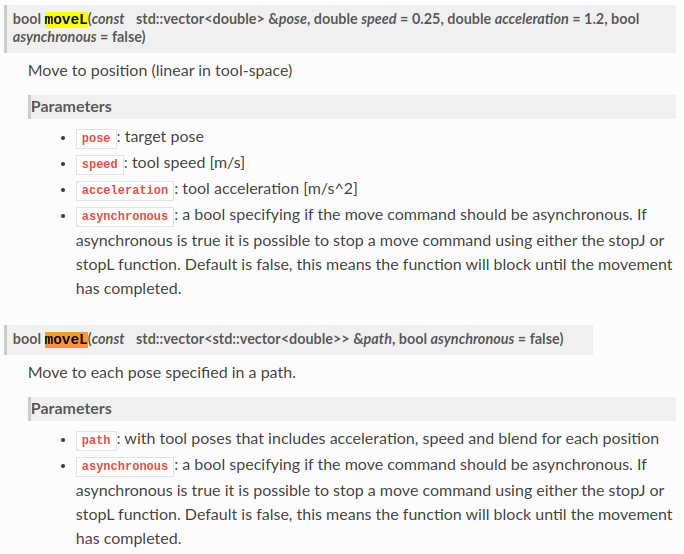

In [ ]:
current_eff_pose = reciever_lightning.getActualTCPPose()

current_eff_pose[1] += 0.07965127   ## Move the end effector 10cm in the x direction.
current_eff_pose[2] -= -0.10451208
lighting_controller.moveL(current_eff_pose, 0.1, 0.1)

### Using MoveJ function.

moveL : Move to a specified Joint Position. (Linear in Joint space.)

Can be given a single location. Or a bunch of locations to excute.

See Doc : https://sdurobotics.gitlab.io/ur_rtde/api/api.html#_CPPv4N7ur_rtde20RTDEControlInterface5moveLERKNSt6vectorIdEEddb

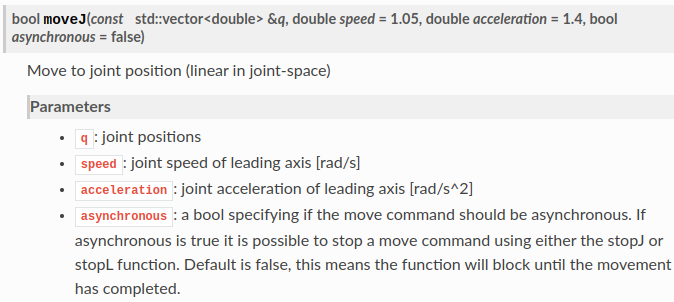

In [ ]:
current_joint_config = reciever_lightning.getActualQ()

current_joint_config[0] -= 0.2   ## Move the base joint by 0.2 radians.

lighting_controller.moveJ(current_joint_config, 0.1, 0.5)

## Working with Gripper.

Doc. Link : https://sdurobotics.gitlab.io/ur_rtde/api/api.html#robotiq-gripper-api

In [ ]:
## Import funtions from gripper.py, Written by ADAM.
from gripper import RobotiqGripper

gripper = RobotiqGripper()
gripper.connect(LIGHTNING_IP, 63352)

## This will activate the gripper and will also auto calibrate the gripper.
gripper.activate()

## Set the enable flag to true so that the gripper can be used.
gripper.set_enable(True)

In [ ]:
## Get Values from the gripper
print("Gripper Max Position : ", gripper.get_max_position())
print("Gripper Min Position : ", gripper.get_min_position())
print("Gripper Open Positin : ", gripper.get_open_position())
print("Gripper Close Position : ", gripper.get_closed_position())
print("Gripper Current Position : ", gripper.get_current_position())

In [ ]:
## Close the gripper.
gripper.set(255)

In [ ]:
## Open the Gripper.
gripper.set(0)